In [ ]:
# !pip3 install sklearn
# !pip3 install pandas
# !pip3 install openpyxl

##Import packages

In [ ]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import datetime

##Import document as data frame

In [ ]:
df = pd.read_excel('./Fluxo_Escolar_por_Escola.xlsx')

##Drop unused columns

In [ ]:
drop_columns = ['NM_DIRETORIA','CD_REDE_ENSINO',	'CD_ESCOLA', 'APR_1', 'REP_1', 'ABA_1', 'APR_2', 'REP_2', 'ABA_2']
df_cleaned = df.drop(drop_columns, axis='columns')

##Renaming columns

In [ ]:
columns_renamed = {
    'Ano':'ano', 
    'NM_MUNICIPIO':'municipio', 
    'NM_COMPLETO_ESCOLA':'escola', 
    'APR_3':'aprovado', 
    'REP_3':'reprovado', 
    'ABA_3':'abandono'
}
df_cleaned = df_cleaned.rename(columns=columns_renamed)

##Drop rows that contains NaN from data frame (cleaned)

In [ ]:
df_cleaned = df_cleaned.dropna()

In [ ]:
#df_cleaned.head(20)

Exportando o resultado de hoje 07-11 23:31

In [ ]:
df_cleaned.to_excel('fluxo_escolar_parcialmente_tratado.xlsx', encoding="utf-8")

# Cleaning and normalizing data

##Install packages if necessary

In [ ]:
# !pip3 install yellowbrick

##Import packages

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import pickle

##Import document as data frame

In [23]:
df_cleaned = pd.read_excel('./data/Fluxo_Escolar_por_Escola_2021.xlsx',engine='openpyxl')
print(df_cleaned.shape)
df_cleaned.head()

(5194, 16)


,ANO_LETIVO,NM_DIRETORIA,NM_MUNICIPIO,CD_REDE_ENSINO,CD_ESCOLA,NM_COMPLETO_ESCOLA,CD_TP_IDENTIFICADOR,APR_1,REP_1,ABA_1,APR_2,REP_2,ABA_2,APR_3,REP_3,ABA_3
0,2021,PIRAJU,PIRAJU,1,34320,JOAQUIM GUILHERME MOREIRA PORTO DOUTOR,8,0.0,0.0,0.0,100.00,0.00,0.0,100.0,0.0,0.0
1,2021,PIRAJU,PIRAJU,1,34344,QUINZINHO CAMARGO PREFEITO,8,0.0,0.0,0.0,99.56,0.44,0.0,94.0,2.0,4.0
2,2021,PIRAJU,PIRAJU,1,34356,NHONHO BRAGA CORONEL,8,0.0,0.0,0.0,100.00,0.00,0.0,100.0,0.0,0.0
3,2021,PIRAJU,PIRAJU,1,34459,ATALIBA LEONEL,8,0.0,0.0,0.0,100.00,0.00,0.0,100.0,0.0,0.0
4,2021,AMERICANA,AMERICANA,1,17152,MAURA ARRUDA GUIDOLIN PROFA,8,100.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0


##Removing fields with "-" value, time value and NaN value

In [24]:
df_cleaned = df_cleaned[df_cleaned != "-"]
df_cleaned = df_cleaned[df_cleaned != datetime.time(0, 0)]
df_cleaned = df_cleaned.dropna()

print(df_cleaned.shape)
df_cleaned.head()

(5194, 16)


,ANO_LETIVO,NM_DIRETORIA,NM_MUNICIPIO,CD_REDE_ENSINO,CD_ESCOLA,NM_COMPLETO_ESCOLA,CD_TP_IDENTIFICADOR,APR_1,REP_1,ABA_1,APR_2,REP_2,ABA_2,APR_3,REP_3,ABA_3
0,2021,PIRAJU,PIRAJU,1,34320,JOAQUIM GUILHERME MOREIRA PORTO DOUTOR,8,0.0,0.0,0.0,100.00,0.00,0.0,100.0,0.0,0.0
1,2021,PIRAJU,PIRAJU,1,34344,QUINZINHO CAMARGO PREFEITO,8,0.0,0.0,0.0,99.56,0.44,0.0,94.0,2.0,4.0
2,2021,PIRAJU,PIRAJU,1,34356,NHONHO BRAGA CORONEL,8,0.0,0.0,0.0,100.00,0.00,0.0,100.0,0.0,0.0
3,2021,PIRAJU,PIRAJU,1,34459,ATALIBA LEONEL,8,0.0,0.0,0.0,100.00,0.00,0.0,100.0,0.0,0.0
4,2021,AMERICANA,AMERICANA,1,17152,MAURA ARRUDA GUIDOLIN PROFA,8,100.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0


##Converting datetime values to correct format

In [25]:
for index, row in df_cleaned.iterrows():
    if(isinstance(row['APR_3'], datetime.datetime)):
        if row['APR_3'].month < 10:
            new_value = str(row['APR_3'].day) + ".0" + str(row['APR_3'].month)
        else:
            new_value = str(row['APR_3'].day) + "." + str(row['APR_3'].month)
        df_cleaned['APR_3'] = df_cleaned['APR_3'].replace([row['APR_3']], new_value)

    if(isinstance(row['REP_3'], datetime.datetime)):
        if row['REP_3'].month < 10:
            new_value = str(row['REP_3'].day) + ".0" + str(row['REP_3'].month)
        else:
            new_value = str(row['REP_3'].day) + "." + str(row['REP_3'].month)
        df_cleaned['REP_3'] = df_cleaned['REP_3'].replace([row['REP_3']], new_value)

    if(isinstance(row['ABA_3'], datetime.datetime)):
        if row['ABA_3'].month < 10:
            new_value = str(row['ABA_3'].day) + ".0" + str(row['ABA_3'].month)
        else:
            new_value = str(row['ABA_3'].day) + "." + str(row['ABA_3'].month)
        df_cleaned['ABA_3'] = df_cleaned['ABA_3'].replace([row['ABA_3']], new_value)

print(df_cleaned.shape)
df_cleaned.head()


(5194, 16)


,ANO_LETIVO,NM_DIRETORIA,NM_MUNICIPIO,CD_REDE_ENSINO,CD_ESCOLA,NM_COMPLETO_ESCOLA,CD_TP_IDENTIFICADOR,APR_1,REP_1,ABA_1,APR_2,REP_2,ABA_2,APR_3,REP_3,ABA_3
0,2021,PIRAJU,PIRAJU,1,34320,JOAQUIM GUILHERME MOREIRA PORTO DOUTOR,8,0.0,0.0,0.0,100.00,0.00,0.0,100.0,0.0,0.0
1,2021,PIRAJU,PIRAJU,1,34344,QUINZINHO CAMARGO PREFEITO,8,0.0,0.0,0.0,99.56,0.44,0.0,94.0,2.0,4.0
2,2021,PIRAJU,PIRAJU,1,34356,NHONHO BRAGA CORONEL,8,0.0,0.0,0.0,100.00,0.00,0.0,100.0,0.0,0.0
3,2021,PIRAJU,PIRAJU,1,34459,ATALIBA LEONEL,8,0.0,0.0,0.0,100.00,0.00,0.0,100.0,0.0,0.0
4,2021,AMERICANA,AMERICANA,1,17152,MAURA ARRUDA GUIDOLIN PROFA,8,100.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0


##Removing lines with negative number

In [26]:
df_cleaned['ABA_3'] = df_cleaned['ABA_3'].astype(str)
df_cleaned = df_cleaned[df_cleaned["ABA_3"].str.contains("-") == False]

print(df_cleaned.shape)
df_cleaned.head()

(5188, 16)


,ANO_LETIVO,NM_DIRETORIA,NM_MUNICIPIO,CD_REDE_ENSINO,CD_ESCOLA,NM_COMPLETO_ESCOLA,CD_TP_IDENTIFICADOR,APR_1,REP_1,ABA_1,APR_2,REP_2,ABA_2,APR_3,REP_3,ABA_3
0,2021,PIRAJU,PIRAJU,1,34320,JOAQUIM GUILHERME MOREIRA PORTO DOUTOR,8,0.0,0.0,0.0,100.00,0.00,0.0,100.0,0.0,0.0
1,2021,PIRAJU,PIRAJU,1,34344,QUINZINHO CAMARGO PREFEITO,8,0.0,0.0,0.0,99.56,0.44,0.0,94.0,2.0,4.0
2,2021,PIRAJU,PIRAJU,1,34356,NHONHO BRAGA CORONEL,8,0.0,0.0,0.0,100.00,0.00,0.0,100.0,0.0,0.0
3,2021,PIRAJU,PIRAJU,1,34459,ATALIBA LEONEL,8,0.0,0.0,0.0,100.00,0.00,0.0,100.0,0.0,0.0
4,2021,AMERICANA,AMERICANA,1,17152,MAURA ARRUDA GUIDOLIN PROFA,8,100.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0


##Convert columns to float

In [27]:
df_cleaned['APR_3'] = df_cleaned['APR_3'].astype(float)
df_cleaned['REP_3'] = df_cleaned['REP_3'].astype(float)
df_cleaned['ABA_3'] = df_cleaned['ABA_3'].astype(float)

##Remove rows that have just 0 values and reset index

In [28]:
indexZero = df_cleaned[(df_cleaned['APR_3'] == 0) & (df_cleaned['REP_3'] == 0) & (df_cleaned['ABA_3'] == 0)].index
df_cleaned.drop(indexZero, inplace=True)

df_cleaned = df_cleaned.reset_index()

print(df_cleaned.shape)
df_cleaned.head()

(3739, 17)


,index,ANO_LETIVO,NM_DIRETORIA,NM_MUNICIPIO,CD_REDE_ENSINO,CD_ESCOLA,NM_COMPLETO_ESCOLA,CD_TP_IDENTIFICADOR,APR_1,REP_1,ABA_1,APR_2,REP_2,ABA_2,APR_3,REP_3,ABA_3
0,0,2021,PIRAJU,PIRAJU,1,34320,JOAQUIM GUILHERME MOREIRA PORTO DOUTOR,8,0.00,0.00,0.0,100.00,0.00,0.0,100.00,0.00,0.00
1,1,2021,PIRAJU,PIRAJU,1,34344,QUINZINHO CAMARGO PREFEITO,8,0.00,0.00,0.0,99.56,0.44,0.0,94.00,2.00,4.00
2,2,2021,PIRAJU,PIRAJU,1,34356,NHONHO BRAGA CORONEL,8,0.00,0.00,0.0,100.00,0.00,0.0,100.00,0.00,0.00
3,3,2021,PIRAJU,PIRAJU,1,34459,ATALIBA LEONEL,8,0.00,0.00,0.0,100.00,0.00,0.0,100.00,0.00,0.00
4,6,2021,AMERICANA,AMERICANA,1,17176,MAGI MONSENHOR,8,94.74,5.26,0.0,93.35,6.65,0.0,79.82,19.29,0.89


##Rename fields

In [29]:
df_cleaned = df_cleaned.rename(columns={'Ano':'ano', 'NM_MUNICIPIO':'municipio', 'CD_REDE_ENSINO':'id_rede_ensino', 'CD_ESCOLA':'id_escola', 'NM_COMPLETO_ESCOLA':'escola', 'APR_3':'aprovado', 'REP_3':'reprovado', 'ABA_3':'abandono'})
df_cleaned.head()

,index,ANO_LETIVO,NM_DIRETORIA,municipio,id_rede_ensino,id_escola,escola,CD_TP_IDENTIFICADOR,APR_1,REP_1,ABA_1,APR_2,REP_2,ABA_2,aprovado,reprovado,abandono
0,0,2021,PIRAJU,PIRAJU,1,34320,JOAQUIM GUILHERME MOREIRA PORTO DOUTOR,8,0.00,0.00,0.0,100.00,0.00,0.0,100.00,0.00,0.00
1,1,2021,PIRAJU,PIRAJU,1,34344,QUINZINHO CAMARGO PREFEITO,8,0.00,0.00,0.0,99.56,0.44,0.0,94.00,2.00,4.00
2,2,2021,PIRAJU,PIRAJU,1,34356,NHONHO BRAGA CORONEL,8,0.00,0.00,0.0,100.00,0.00,0.0,100.00,0.00,0.00
3,3,2021,PIRAJU,PIRAJU,1,34459,ATALIBA LEONEL,8,0.00,0.00,0.0,100.00,0.00,0.0,100.00,0.00,0.00
4,6,2021,AMERICANA,AMERICANA,1,17176,MAGI MONSENHOR,8,94.74,5.26,0.0,93.35,6.65,0.0,79.82,19.29,0.89


##Normalizing data

In [30]:
normalized_list = preprocessing.normalize([df_cleaned['ANO_LETIVO'],df_cleaned['aprovado'],df_cleaned['reprovado'],df_cleaned['abandono']])

df_cleaned['ano_normalized'] = normalized_list[0]
df_cleaned['aprovado_normalized'] = normalized_list[1]
df_cleaned['reprovado_normalized'] = normalized_list[2]
df_cleaned['abandono_normalized'] = normalized_list[3]

df_cleaned.head()

,index,ANO_LETIVO,NM_DIRETORIA,municipio,id_rede_ensino,id_escola,escola,CD_TP_IDENTIFICADOR,APR_1,REP_1,...,APR_2,REP_2,ABA_2,aprovado,reprovado,abandono,ano_normalized,aprovado_normalized,reprovado_normalized,abandono_normalized
0,0,2021,PIRAJU,PIRAJU,1,34320,JOAQUIM GUILHERME MOREIRA PORTO DOUTOR,8,0.00,0.00,...,100.00,0.00,0.0,100.00,0.00,0.00,0.016354,0.016734,0.000000,0.000000
1,1,2021,PIRAJU,PIRAJU,1,34344,QUINZINHO CAMARGO PREFEITO,8,0.00,0.00,...,99.56,0.44,0.0,94.00,2.00,4.00,0.016354,0.015730,0.007529,0.031967
2,2,2021,PIRAJU,PIRAJU,1,34356,NHONHO BRAGA CORONEL,8,0.00,0.00,...,100.00,0.00,0.0,100.00,0.00,0.00,0.016354,0.016734,0.000000,0.000000
3,3,2021,PIRAJU,PIRAJU,1,34459,ATALIBA LEONEL,8,0.00,0.00,...,100.00,0.00,0.0,100.00,0.00,0.00,0.016354,0.016734,0.000000,0.000000
4,6,2021,AMERICANA,AMERICANA,1,17176,MAGI MONSENHOR,8,94.74,5.26,...,93.35,6.65,0.0,79.82,19.29,0.89,0.016354,0.013357,0.072618,0.007113


##Creating normalized file

In [31]:
df_cleaned.to_excel('./data/FluxoEscolarNormalizado.xlsx', encoding="utf-8")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


# Start of creating the predictive model

##Import libs

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#Check point: Open the file created from the normalization above


##Choosing which municipality we want to analyze

In [35]:
df = pd.read_excel('./data/FluxoEscolarNormalizado.xlsx', engine='openpyxl')
df = df[df["municipio"] == "SAO PAULO"]
df.head()

,Unnamed: 0,index,ANO_LETIVO,NM_DIRETORIA,municipio,id_rede_ensino,id_escola,escola,CD_TP_IDENTIFICADOR,APR_1,...,APR_2,REP_2,ABA_2,aprovado,reprovado,abandono,ano_normalized,aprovado_normalized,reprovado_normalized,abandono_normalized
364,364,496,2021,NORTE 1,SAO PAULO,1,24,GAVIAO PEIXOTO BRIGADEIRO,8,100.0,...,99.61,0.39,0.0,99.80,0.00,0.2,0.016354,0.016700,0.000000,0.001598
365,365,497,2021,NORTE 1,SAO PAULO,1,36,JOAO SOLIMEO,8,0.0,...,100.00,0.00,0.0,100.00,0.00,0.0,0.016354,0.016734,0.000000,0.000000
366,366,498,2021,NORTE 1,SAO PAULO,1,48,WALFREDO ARANTES CALDAS PROFESSOR,8,0.0,...,0.00,0.00,0.0,99.91,0.09,0.0,0.016354,0.016719,0.000339,0.000000
367,367,499,2021,NORTE 1,SAO PAULO,1,59,SEBASTIAO DE OLIVEIRA GUSMAO PROFESSOR,8,0.0,...,0.00,0.00,0.0,99.07,0.93,0.0,0.016354,0.016578,0.003501,0.000000
368,368,503,2021,NORTE 1,SAO PAULO,1,97,RENATO DE ARRUDA PENTEADO PROFESSOR,8,0.0,...,0.00,0.00,0.0,100.00,0.00,0.0,0.016354,0.016734,0.000000,0.000000


##Removing unnecessary columns

In [36]:
df = df.drop(['Unnamed: 0', 'index', 'ANO_LETIVO', 'NM_DIRETORIA', 'municipio','id_rede_ensino', 'id_escola', 'escola', 'CD_TP_IDENTIFICADOR', 'APR_1', 'REP_1', 'ABA_1', 'APR_2', 'REP_2', 'ABA_2', 'aprovado', 'reprovado', 'abandono', 'reprovado_normalized', 'abandono_normalized'], axis='columns')
df.head()

,ano_normalized,aprovado_normalized
364,0.016354,0.016700
365,0.016354,0.016734
366,0.016354,0.016719
367,0.016354,0.016578
368,0.016354,0.016734


#Scraping the data to decrease bias

In [39]:
random_df = df.sample(frac=1).reset_index(drop=True)
random_df.head()

,ano_normalized,aprovado_normalized
0,0.016354,0.012631
1,0.016354,0.013007
2,0.016354,0.013265
3,0.016354,0.016734
4,0.016354,0.016734


#Split the data frame between training and testing

In [40]:
train, test = train_test_split(random_df, test_size=0.2)

## Handling training data

#Split between predictors and classes

In [41]:
train.columns

Index(['ano_normalized', 'aprovado_normalized'], dtype='object')

#Get all the feature examples

In [48]:
x_df_train = train.iloc[:, :-1].values
x_df_train

array([[0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.016

#Get all labels from the target

In [47]:
y_df_train = train.iloc[:, -1].values
y_df_train

array([0.01661151, 0.01528955, 0.01646761, 0.01673367, 0.01638728,
       0.01673367, 0.01594551, 0.01656633, 0.01376846, 0.0166751 ,
       0.01673367, 0.01673367, 0.01673367, 0.01654458, 0.01673367,
       0.01513226, 0.01673367, 0.01666841, 0.01582838, 0.0148093 ,
       0.01647765, 0.01577818, 0.01670522, 0.01506365, 0.01610281,
       0.01571459, 0.01546358, 0.01673367, 0.01619987, 0.01673367,
       0.01572463, 0.01413493, 0.01350407, 0.01115634, 0.01587691,
       0.01538494, 0.01269249, 0.01532972, 0.015067  , 0.01620823,
       0.01673367, 0.01673367, 0.01673367, 0.01673367, 0.01630529,
       0.01608273, 0.01653119, 0.01673367, 0.01673367, 0.01673367,
       0.01449973, 0.01594719, 0.01673367, 0.01427215, 0.01409477,
       0.01673367, 0.01666004, 0.01669853, 0.01673367, 0.01673367,
       0.01584009, 0.01609946, 0.01470722, 0.01673367, 0.01673367,
       0.01656299, 0.01651111, 0.01518581, 0.01613963, 0.01673367,
       0.01673367, 0.01673367, 0.01673367, 0.01583173, 0.01641

#Handling categorical data with one hot encoder

In [ ]:
# onehotencoder_train = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1])], remainder='passthrough')

In [ ]:
# x_df_train = onehotencoder_train.fit_transform(x_df_train).toarray()
# x_df_train[0]

## Handling test data

#Split between predictors and classes

In [49]:
test.columns

Index(['ano_normalized', 'aprovado_normalized'], dtype='object')

#Get all the feature examples

In [50]:
x_df_test = test.iloc[:, :-1].values
x_df_test

array([[0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.01635394],
       [0.016

#Get all labels from the target

In [51]:
y_df_test = test.iloc[:, -1].values
y_df_test

array([0.01039161, 0.01673367, 0.01655797, 0.01420689, 0.01583173,
       0.01673367, 0.01598233, 0.01673367, 0.01564431, 0.01659311,
       0.01673367, 0.01658976, 0.01366472, 0.01508038, 0.01508708,
       0.01673367, 0.01571124, 0.01673367, 0.01657805, 0.01662658,
       0.01562423, 0.01497496, 0.01673367, 0.01557403, 0.01673367,
       0.01673367, 0.01666674, 0.01602751, 0.01568782, 0.01250507,
       0.01673367, 0.01401612, 0.01571794, 0.01636051, 0.01626847,
       0.01662992, 0.01673367, 0.01661653, 0.01673367, 0.01638394,
       0.01568782, 0.01417509, 0.01628186, 0.01673367, 0.01583005,
       0.01673367, 0.0166751 , 0.01669016, 0.01658809, 0.01641238,
       0.01379858, 0.01673367, 0.01673367, 0.01673367, 0.01594886,
       0.01673367, 0.01643916, 0.01667678, 0.01454491, 0.01651111,
       0.01668682, 0.01450642, 0.01433741, 0.01650442, 0.0146269 ,
       0.01572128, 0.01673367, 0.01673367, 0.01564766, 0.01642912,
       0.01605596, 0.01263057, 0.01673367, 0.01588025, 0.01613

#Handling categorical data with one hot encoder

In [ ]:
# onehotencoder_test = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1])], remainder='passthrough')

In [ ]:
# x_df_test = onehotencoder_test.fit_transform(x_df_test).toarray()
# x_df_test[0]

##Save variables

In [52]:
with open('students.pickle', mode='wb') as f:
    pickle.dump([x_df_train, y_df_train, x_df_test, y_df_test], f)

# Test using Linear Regression Model

##Creating a linear regression object

In [53]:
regr = linear_model.LinearRegression()
regr

LinearRegression()

##Conducting training

In [54]:
regr.fit(x_df_train, y_df_train)

LinearRegression()

##Performing tests

In [58]:
aprovados_y_pred = regr.predict(x_df_test)


##Coefficients

In [59]:
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [0.72637136]


##Mean square error

In [60]:
print("Mean square error: %.2f" % mean_squared_error(y_df_test, aprovados_y_pred))

Erro quadrático médio: 0.00


##Coefficient of determination: "1" is a perfect prediction

In [67]:
print("Coefficient of determination: %.2f" % r2_score(y_df_test, aprovados_y_pred))

Coefficient of determination: -0.02


##Plots

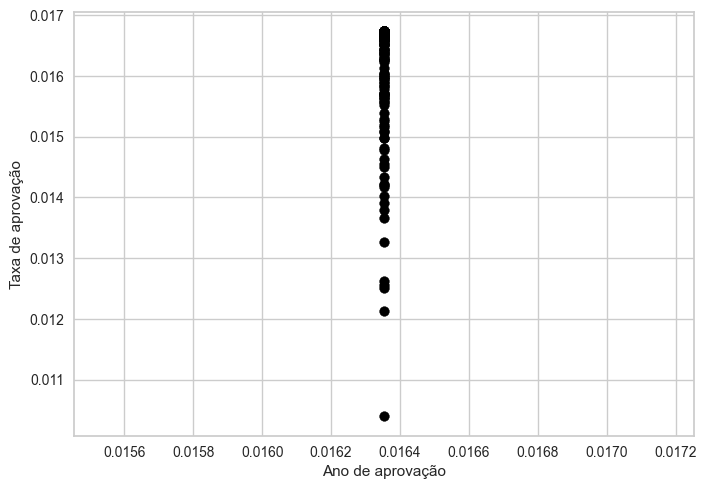

In [66]:
plt.scatter(x_df_test, y_df_test, color="black")
plt.plot(x_df_test, aprovados_y_pred, color="blue", linewidth=3)

plt.ylabel("Taxa de aprovação")
plt.xlabel("Ano de aprovação")
plt.show()